# Stage 5

A short overview of the ML hyperparameter modes is covered in this notebook. As well as a summary of the different combinations for ML training and testing. 

For this investigation project, there are certain comparisons that we want to make to better understand what affects the ML models' ability to learn and distinguish noise fingerprints. These comparisons also should reveal some facts about the behaviour of the noise fingerprints of current quantum hardware.

These comparisons are formalated as test-tables, where a certain slice of the data is used to train our ML models. These models will then be tested on other slices of the data to try to expose what causes similarities and differences in how an ML model interprets noise fingerprints.

This notebook contains the following sections:

1. [The ML Parameter Modes](#2-ml-parameter-settings)
2. [The Test-tables](#1-test-tables)



## Imports

In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.decomposition import PCA
# from sklearn.neighbors import KNeighborsClassifier

from investigation_functions import ml_funcs as mlf
from investigation_functions import  ml_visualisation_funcs as mvf
from investigation_functions import  data_process_funcs as dpf
from investigation_functions import  test_table_funcs as ttf
import ml_models_vars

## 1. ML parameter settings


### SVM

The best SVM hyper-parameters per experiment type are stored as 'modes' in the ml_models_vars.py file (path: code/ml_models_vars.py)


| Mode          | Kernel        | Degree        |  Coef0        |  C           |
| ------------- | ------------- | ------------- | ------------- |------------- |
| 0             | linear        |               |               |              |
| 1             | poly          |               | 0.5           |450           |
| 2             | poly          | 5             |               |              |
| 3             | rbf           |               |               |450           |
| 4             | poly          | 5             |               |450           |

- mode 0: good for hardware
- mode 1: good for old sim
- mode 2: good for refreshed sim
- mode 3: ok for old sim
- mode 4: good for refreshed sim 16 qubits


### KNN

The best KNN hyper parameters are also stored in th same ml_models_vars.py file.


| Mode      | K-vals     | Weights   |  Algorithm    |  Metric      |
| ----------| -----------| ----------| ------------- |------------- |
| 0         | 5, 10, 15  | uniform   |               |p=2(Manhattan)|
| 1         | 5, 10, 15  | distance  |               |              |
| 2         | 5, 10, 15  | distance  | ball_tree     |              |
| 3         | 5, 10, 15  | distance  | kd_tree       |              |
| 4         | 5, 10, 15  | uniform   |               |p=1(Euclid?)  |


### Using the code
To access these modes you can use the following code:

In [5]:
all_param_modes = ml_models_vars.Param_Modes()

svm_modes = all_param_modes.SVM_modes

knn_modes = all_param_modes.KNN_modes


To access a single SVM mode at a time, use an index.
The underlying SVC model can be accessed by using .model on the single SVM_mode

In [6]:
for i in range(5):
    print(
        "SVM mode "+str(i)+": \n\t Mode Object:",svm_modes[i],
         "\n\t Underlying SVC model:",
          svm_modes[i].model
        )

SVM mode 0: 
	 Mode Object: SVM_mode() 
	 Underlying SVC model: SVC(C=1, coef0=0, kernel='linear')
SVM mode 1: 
	 Mode Object: SVM_mode() 
	 Underlying SVC model: SVC(C=1, coef0=0, degree=5, kernel='poly')
SVM mode 2: 
	 Mode Object: SVM_mode() 
	 Underlying SVC model: SVC(C=450, coef0=0)
SVM mode 3: 
	 Mode Object: SVM_mode() 
	 Underlying SVC model: SVC(C=450, coef0=0.5, kernel='poly')
SVM mode 4: 
	 Mode Object: SVM_mode() 
	 Underlying SVC model: SVC(C=450, coef0=0, degree=5, kernel='poly')


The KNN modes are slightly different. They are a 2d array whereas the SVM modes are a 1D array.An idea on the structure can be seen in the tables above. The following code gives an example of how to access the individual KNN modes and their models.

In [7]:
number_of_knn_modes = 5
number_of_k_values = 3
for i in range(number_of_knn_modes):
    print(
          "KNN mode "+str(i)+":"
        )
    for k in range(number_of_k_values):
      print(
          "\n\t k = ",knn_modes[i][k].base_param,
          "\n\t Mode Object:",knn_modes[i][k],
          "\n\t Underlying SVC model:",
            knn_modes[i][k].model
          )

KNN mode 0:

	 k =  5 
	 Mode Object: <ml_models_vars.KNN_mode object at 0x00000245C6A2D090> 
	 Underlying SVC model: KNeighborsClassifier()

	 k =  10 
	 Mode Object: <ml_models_vars.KNN_mode object at 0x00000245C6A2D310> 
	 Underlying SVC model: KNeighborsClassifier(n_neighbors=10)

	 k =  15 
	 Mode Object: <ml_models_vars.KNN_mode object at 0x00000245C691B820> 
	 Underlying SVC model: KNeighborsClassifier(n_neighbors=15)
KNN mode 1:

	 k =  5 
	 Mode Object: <ml_models_vars.KNN_mode object at 0x00000245C6D31250> 
	 Underlying SVC model: KNeighborsClassifier(p=1, weights='distance')

	 k =  10 
	 Mode Object: <ml_models_vars.KNN_mode object at 0x00000245C6A197B0> 
	 Underlying SVC model: KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

	 k =  15 
	 Mode Object: <ml_models_vars.KNN_mode object at 0x00000245C6A199D0> 
	 Underlying SVC model: KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
KNN mode 2:

	 k =  5 
	 Mode Object: <ml_models_vars.KNN_mode object

The default k-values used to construct the knn modes are [5,10,15]. These can be changed when creating the Parm_Modes obejct. 

### Testing the Parameter Modes



This section is to illustrate the accuracy of the chosen SVM modes for the different experiment types for 4 qubits. The full testing including the 8 and 16 qubits for SVM and all of the KNN testing can be found in the Further_detail folder. The relevant files are linked below:

1. [SVM parameter baseline testing](Further_detail/SVM_baseline_testing.ipynb)
2. [SVM parameter testing across experiment types](Futher_detail/SVM_parameter_testing.ipynb)
3. [KNN parameter testing](Further_detail/KNN_param_testing.ipynb)
4. [KNN k-value testing, and testing across experiment types](Further_detail/KNN_kval_testing.ipynb)

Note that this testing was done before the IBM license was granted. As such, there were not yet any 16q Hardware runs that could be tested on.

SVM 4q:

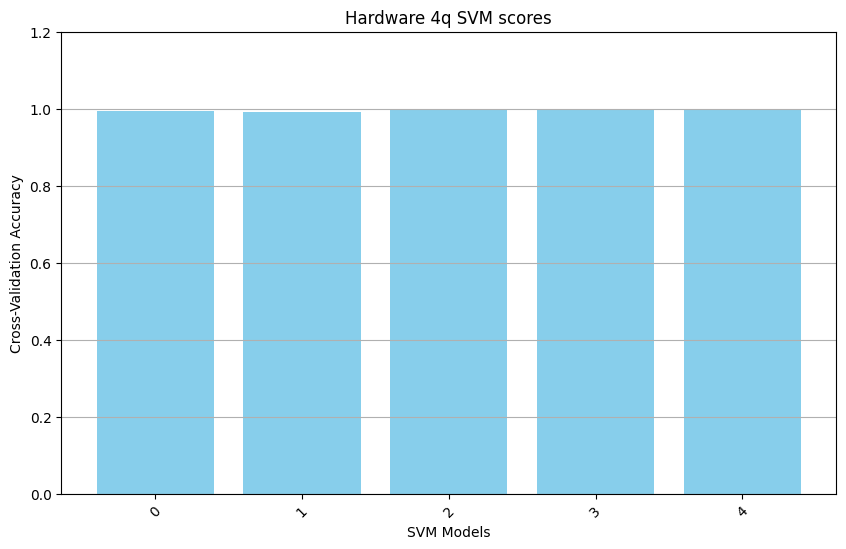

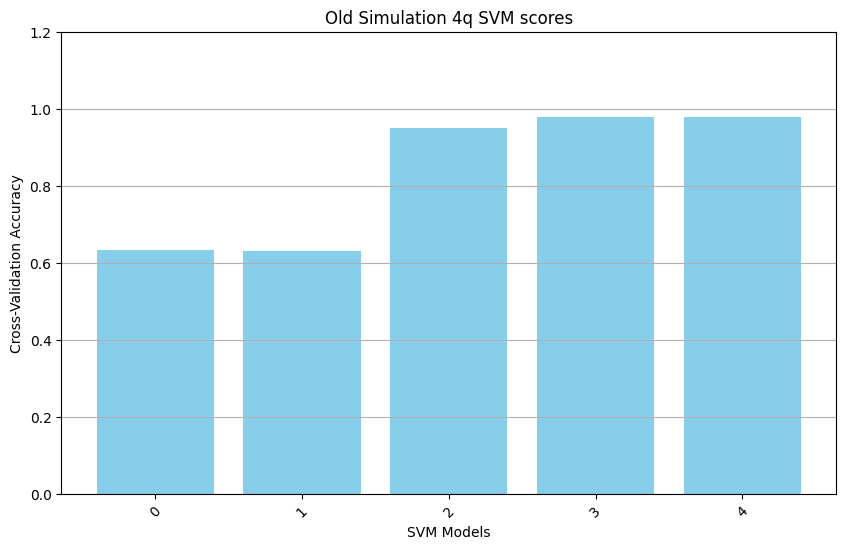

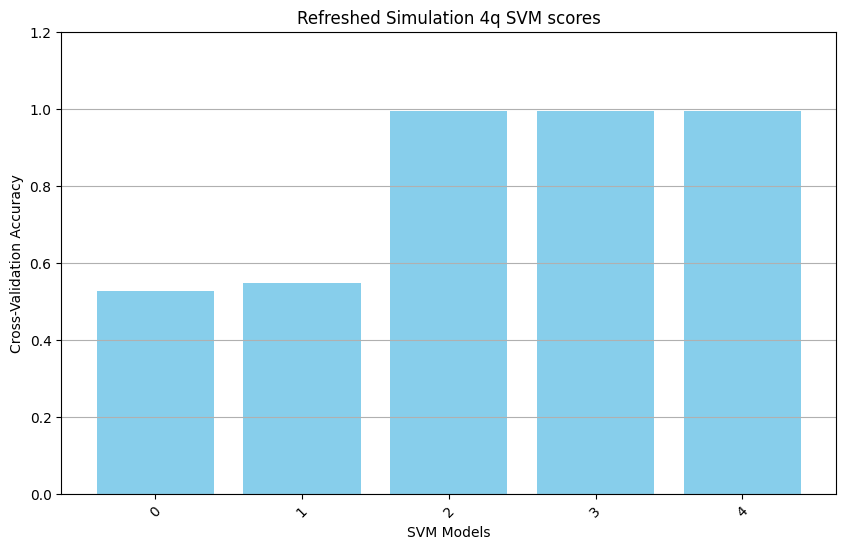

In [ ]:
initial_list = ttf.get_HSR_array_all_backends('Hardware',4,'../../',True)
df_H = initial_list[0]
df_processed = mlf.apply_preprosessing(df_H)
df_S = initial_list[1]
dfS_processed = mlf.apply_preprosessing(df_S)
df_R = initial_list[2]
dfR_processed = mlf.apply_preprosessing(df_R)

# fig = plt.Figure(figsize=(10,2))

fig =mvf.print_and_plot_svm_models(
    df_processed,svm_modes,title = 'Hardware 4q SVM scores'
    )

fig =mvf.print_and_plot_svm_models(
    dfS_processed,svm_modes,title = 'Old Simulation 4q SVM scores')

fig =mvf.print_and_plot_svm_models(
    dfR_processed,svm_modes,title = 'Refreshed Simulation 4q SVM scores')


## 2. Test tables

Experiment Type

'HSR' test table

| Train         | Test          |               |               |
| ------------- | ------------- | ------------- | ------------- |
| Full Hardware | Sim           |R Sim          | Sim +R Sim    |
| Sim           | R Sim         |Full Hardware  |               |
| R Sim         | Sim           |Full Hardware  |               |
| Sim +R Sim    |Full Hardware  |               |               |

Hardware age
| Train         | Test          |
| ------------- | ------------- |
| New Hardware  |Old Hardware   |
| Old Hardware  |New Hardware   |

Circuit type

| Train         | Test          |               |               |
| ------------- | ------------- | ------------- | ------------- |
| c1            | c2            |c3             | c2,c3         |
| c2            | c1            |c3             | c1,c3         |
| c3            | c1            |c1             | c1,c2         |
| c1,c2         | c3            |               |               |
| c1,c3         | c2            |               |               |
| c2,c3         | c1            |               |               |




In [ ]:
nr_qubits =4

initial_list = ttf.get_HSR_array_all_backends(
    nr_qubits, dir_ = '../../',updated_results=True)

In [ ]:
test_table_HSR4q = ttf.get_HSR_test_table(initial_list)
ttf.print_test_table(test_table_HSR4q)


row 0
training df
experiment_type:  ['Hardware']
backend:  ['brisbane' 'torino' 'fez' 'marrakesh']
circuit_type:  ['1' '2' '3']

test df  1
experiment_type:  ['Simulation']
backend:  ['brisbane' 'fez' 'marrakesh' 'torino']
circuit_type:  ['1' '2' '3']

test df  2
experiment_type:  ['Refreshed_Simulation']
backend:  ['brisbane' 'fez' 'marrakesh' 'torino']
circuit_type:  ['1' '2' '3']

test df  3
experiment_type:  ['Sim and Refreshed']
backend:  ['brisbane' 'fez' 'marrakesh' 'torino']
circuit_type:  ['1' '2' '3']

row 1
training df
experiment_type:  ['Simulation']
backend:  ['brisbane' 'fez' 'marrakesh' 'torino']
circuit_type:  ['1' '2' '3']

test df  1
experiment_type:  ['Hardware']
backend:  ['brisbane' 'torino' 'fez' 'marrakesh']
circuit_type:  ['1' '2' '3']

test df  2
experiment_type:  ['Refreshed_Simulation']
backend:  ['brisbane' 'fez' 'marrakesh' 'torino']
circuit_type:  ['1' '2' '3']

row 2
training df
experiment_type:  ['Refreshed_Simulation']
backend:  ['brisbane' 'fez' 'marr

## Next stage -> [Stage 6 ](Stage6_ML_Pipeline.ipynb)